# Introduction

This notebook is dedicated to exploring and visualizing data features before applying machine learning and deep learning models for predicting the average price of diamonds. The objective is to understand the distribution and relationships of various features within the dataset, which will ultimately aid in the development and improvement of our predictive models.

Accurate prediction of diamond prices is crucial for optimizing pricing strategies, improving customer satisfaction, and enhancing revenue management. By analyzing historical diamond data, we can identify patterns and trends that indicate the factors affecting the price. This knowledge enables jewelers and diamond retailers to make informed decisions, such as setting competitive prices or offering promotions to attract customers.

In [73]:
#!nvcc -V && which nvcc

In [74]:
#!python --version
#!nvidia-smi

In [75]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# Importing Libraries

In [76]:
# importing libraries fundamentals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
%matplotlib inline


# Library for Null Values Imputing
import missingno as msno

# importing cudas

# Loading the Dataset

In [77]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


In [78]:
# load cudas extension

# %load_ext cudf.pandas

# import data from gdrive

df = pd.read_csv('//kaggle/input/diamonds/diamonds.csv')

## Dataset Information

In [79]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [80]:
df.describe()
# description of dataset

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [81]:
df.describe(include='object').T

,count,unique,top,freq
cut,53940,5,Ideal,21551
color,53940,7,G,11292
clarity,53940,8,SI1,13065


In [82]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [83]:
df.shape
# Dataset has 119390 rows and 32 columns

(53940, 11)

In [84]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## Find the Categorical and Numerical dtype

In [85]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [86]:
for col in object_columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Counts for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Counts for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [87]:
num_columns = df.select_dtypes(include=['float', 'int64']).columns
print(num_columns)

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


## Dealt with Null Values

In [88]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Exploratory Data Analysis

In [89]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [90]:
df.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


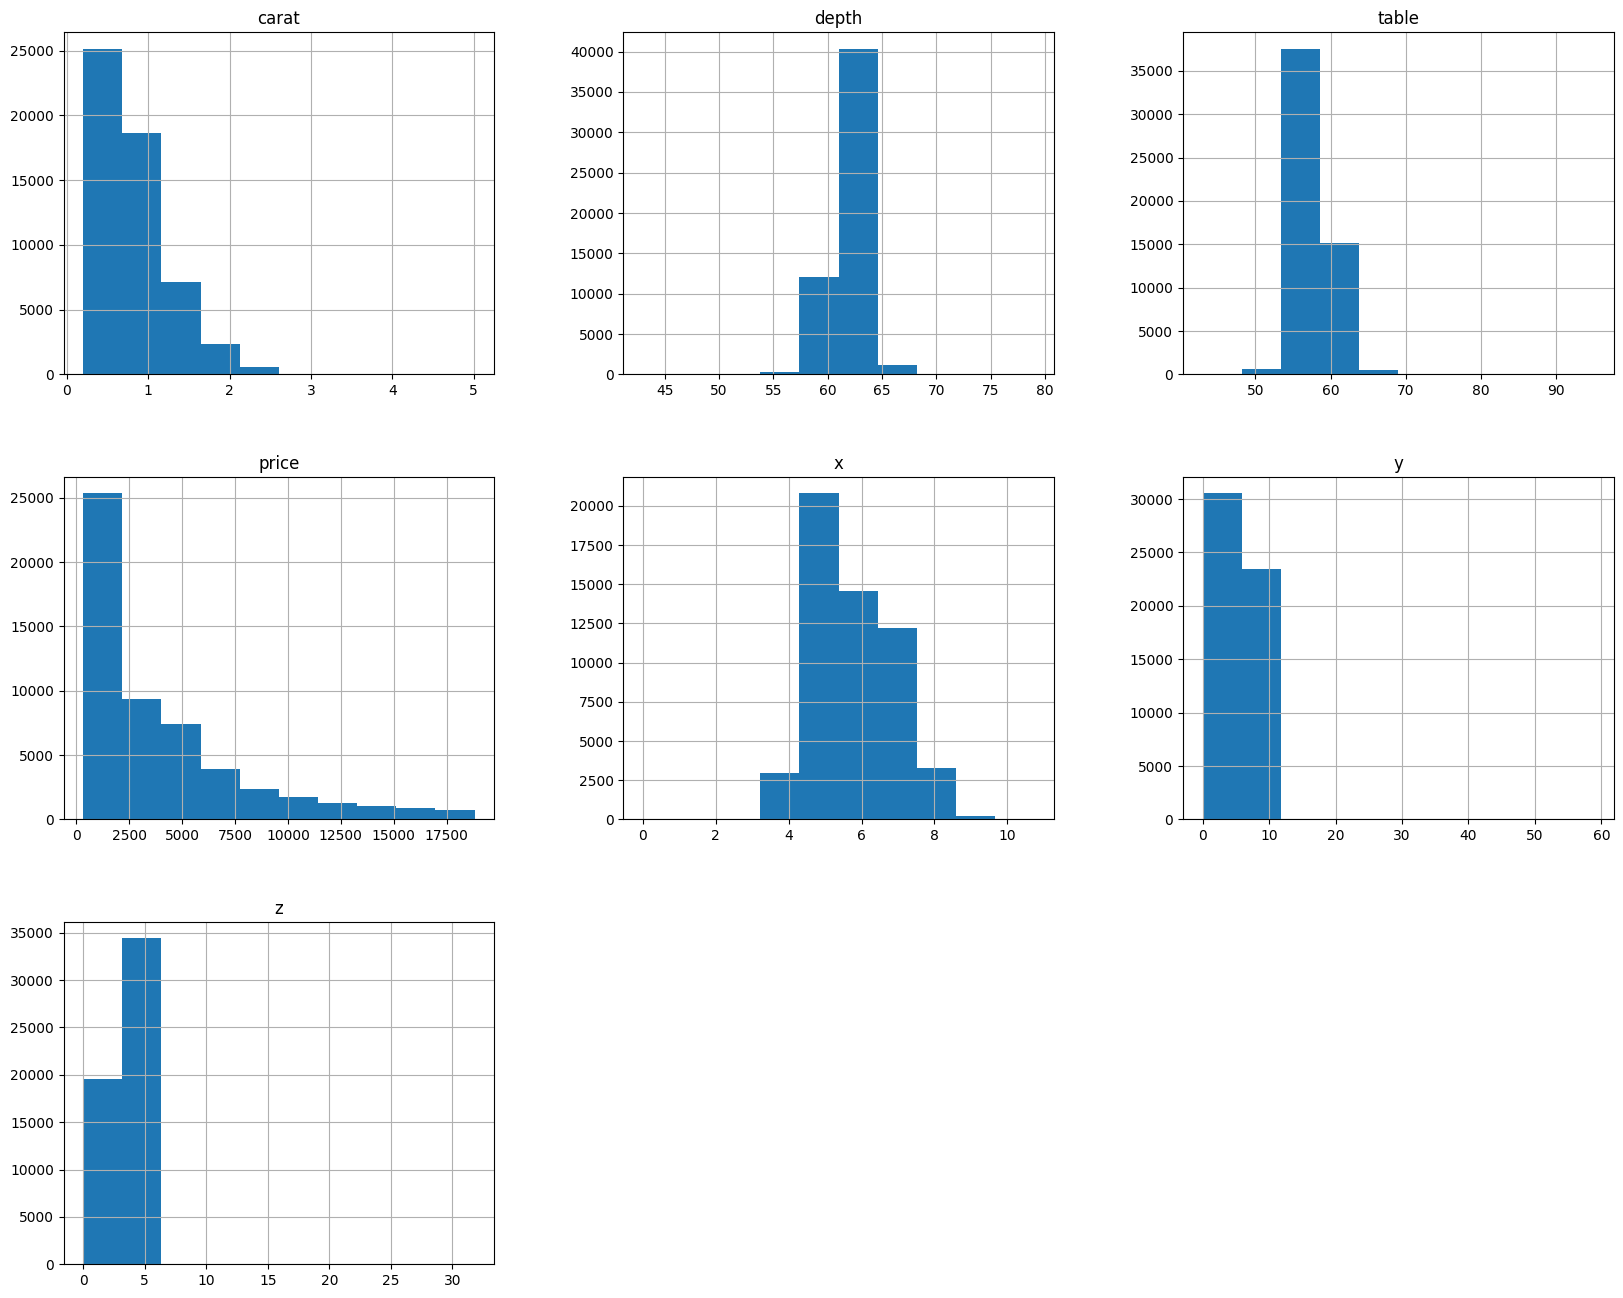

In [91]:
df.hist(figsize=(20, 16))
plt.show()

In [92]:
def plot_pie_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.show()

In [93]:
def plot_bar_singRle(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Plotting All Data Features

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Figure size 1200x800 with 0 Axes>

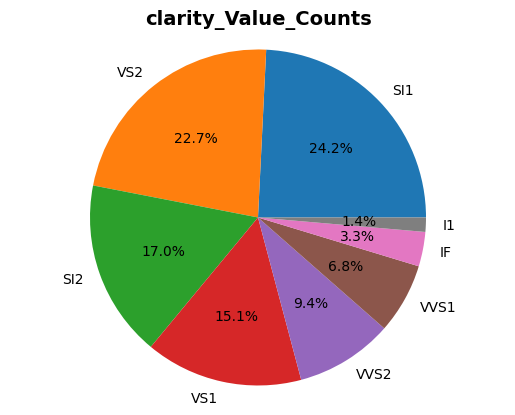

In [95]:
plot_pie_single('clarity')

<Figure size 1200x800 with 0 Axes>

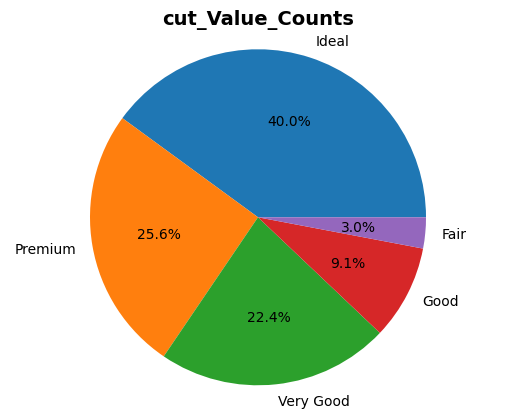

In [96]:
plot_pie_single('cut')

<Figure size 1200x800 with 0 Axes>

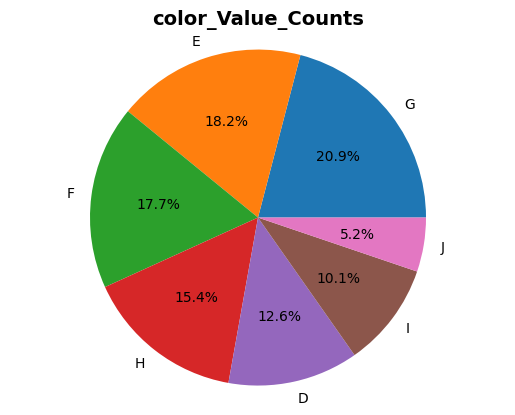

In [97]:
plot_pie_single('color')

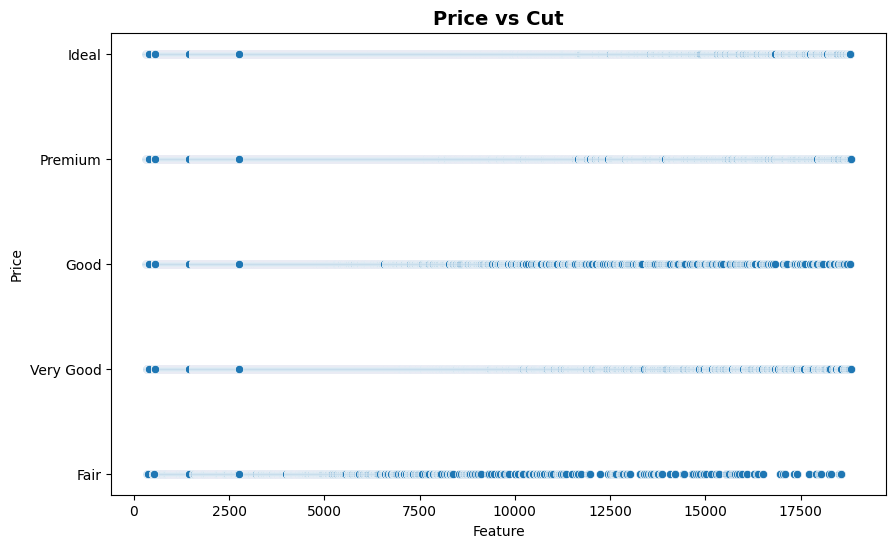

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="cut", data=df)
plt.title("Price vs Cut", fontweight="bold", size=14)
plt.xlabel("Feature")
plt.ylabel("Price")
plt.show()

In [99]:
grouped_cut_colour = df.groupby(["cut","color"])["price"].mean()
grouped_cut_colour

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

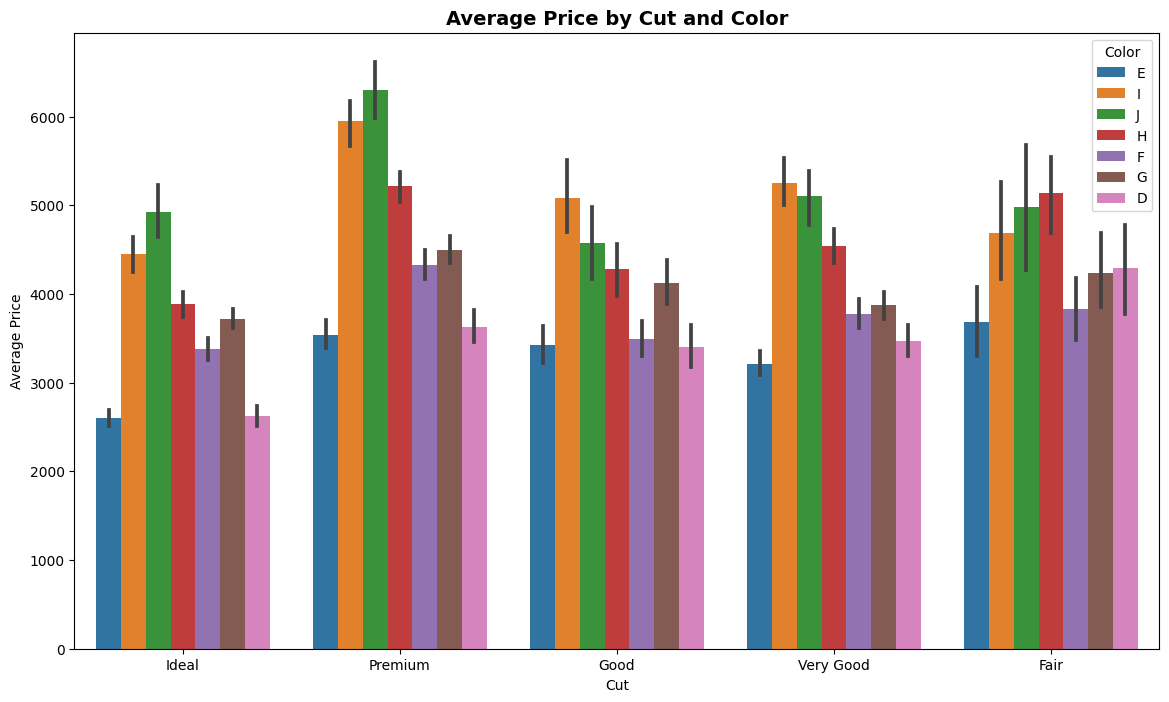

In [100]:
plt.figure(figsize=(14, 8))
sns.barplot(x='cut', y='price', hue='color', data=df)
plt.title('Average Price by Cut and Color', fontweight="bold", size=14)
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.legend(title='Color')
plt.show()

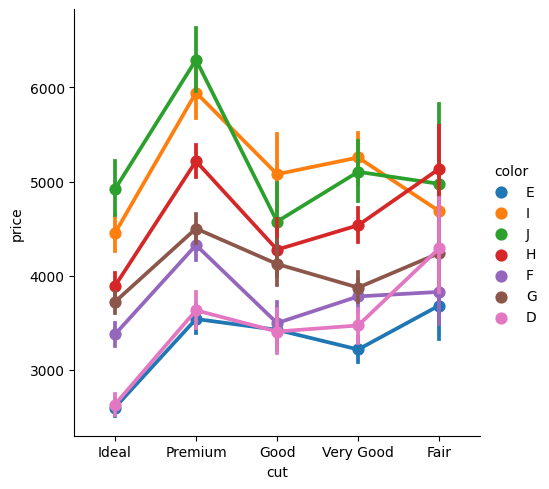

In [101]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=df)

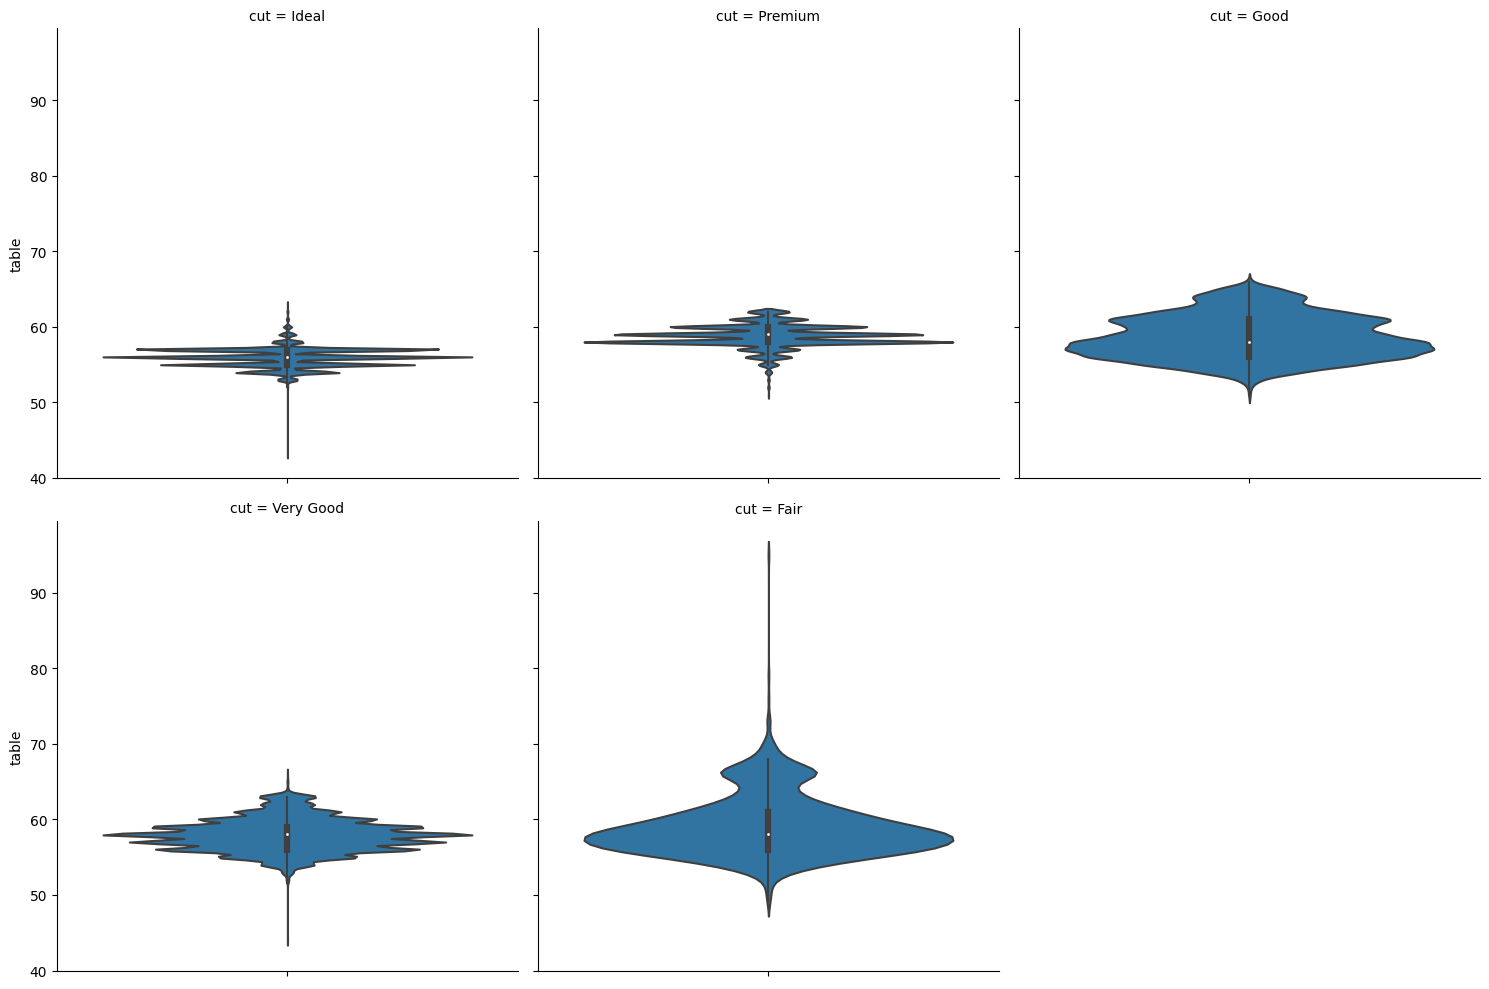

In [102]:
sns.catplot(y='table', kind='violin', hue='cut', data=df,
            col='cut', col_wrap=3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



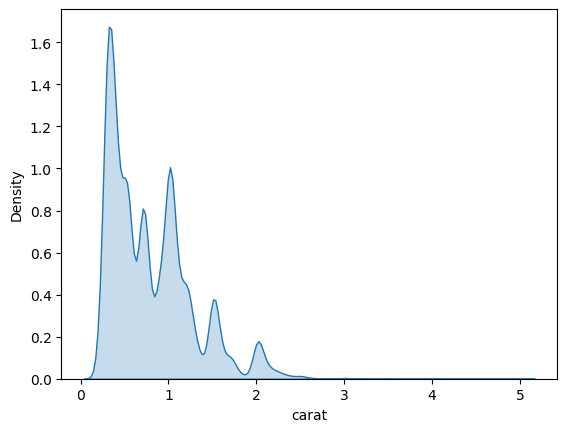

In [103]:
sns.kdeplot(data = df["carat"], fill=True)
plt.show()